## Description of the notebook

---
- This notebook contains a general overview of the included datasets for this project. 
- I go through each dataset, check for its characteristics, and look at some chosen subset of features in more detail. 
- Covering missing values, dimensions, some correlations, counts, and distributions of features.
- Features were chosen based on value they add to the reader, and to myself during further analysis. 
- Analysis was not meant to cover these datasets in depth but to give broader, context information about what is in them.

---

In [1]:
cd home-credit-default-risk/

/home/user/Downloads/Capstone project/home-credit-default-risk


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
application_test = pd.read_csv('application_test.csv')
application_train = pd.read_csv('application_train.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='ISO-8859-1')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


---
- Main dataset used for the project. 
- I will do more detailed analysis of it in main notebook for this project.
---

## bureau_balance.csv

In [4]:
bureau_balance.head(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


- bureau_balance.csv original data description:

    Monthly balances of previous credits in Credit Bureau.
    This table has one row for each month of history of every previous credit
    reported to Credit Bureau – i.e the table has (#loans in sample * # of relative
    previous credits * # of months where we have some history observable for the
    previous credits) rows.
    
    Each row in bureau_balance.csv represents a monthly record of a previous credit (loan or credit facility) that a borrower had and which was reported to a Credit Bureau.

In [5]:
bureau_balance.shape

(27299925, 3)

- More than 27 million credit records in this dataset

----

- Looking at counts of the features

In [6]:
bureau_balance['MONTHS_BALANCE'].value_counts()

MONTHS_BALANCE
-1     622601
-2     619243
-3     615080
 0     610965
-4     609138
        ...  
-92     57300
-93     53535
-94     49965
-95     46542
-96     43147
Name: count, Length: 97, dtype: int64

In [7]:
bureau_balance["STATUS"].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

---

- From the available information about this dataset it is unclear what these labels mean. 
- I will not analyze this feature further due to this limitation.

---

- `MONTHS_BALANCE feature`

In [8]:
monthly_counts = bureau_balance.groupby('MONTHS_BALANCE').size()
monthly_counts.describe()

count        97.000000
mean     281442.525773
std      177784.869420
min       43147.000000
25%      129884.000000
50%      236650.000000
75%      424284.000000
max      622601.000000
dtype: float64

- Count of 97 indicates arround `8 years` worth of data.
- On average, there are about `281,443` credit account records per month.
- ~ `177,785` - High standard deviation indicates significant variability in the number of records across different months. 
- Median =  `236,650`
- We can also see big jump from 25% and 75%, indicating the higher frequency in newer data. 

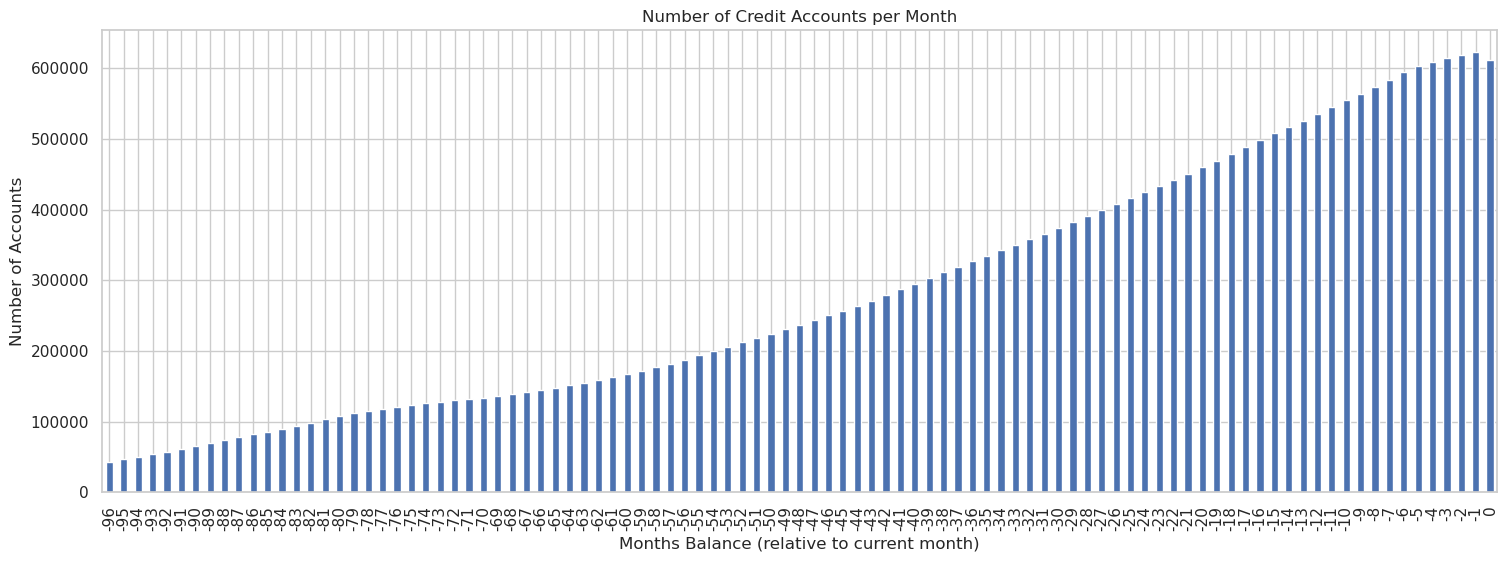

In [41]:
plt.figure(figsize=(18,6))
monthly_counts.plot(kind='bar')
plt.title('Number of Credit Accounts per Month')
plt.xlabel('Months Balance (relative to current month)')
plt.ylabel('Number of Accounts')
sns.set_style("whitegrid")
plt.show()

---
- We can see an increasing trend of number of records per month as we got to the day of data collection. 
- There isn't a clear reason for this, some of my suggestions would be data availability, changes in reporting, growing number of credit accounts or other market changes. 
- Quite limited insight, so besides growing number of credit accounts towards day of data collection, we can't say much. 

---

In [12]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

- No missing values

## bureau.csv

Offical description:
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

---
- There is possibility of merging this with main dataset, if the features were not already there.

In [13]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [42]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

---

- We have some features with missing values.
- Mostly related to explicit amounts of money in different forms. 
- Unclear wht is the reason, it could be this data is not so often publically available, or the different data collection methos or something else happened. 
- For now I will leave them as they are and handle them during process of modeling or other usage of this dataset. 

---

In [14]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


- `CREDIT_ACTIVE feature`

In [15]:
bureau['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

---

- Closed - `1079273` indicating that a large number of the previous credits have been fully paid off and closed.
- Active - `630607` Number of credits are currently active, meaning these credits are still ongoing, and payments are presumably being made. This shows that a significant portion of clients have current credit obligations.
- Sold - `6,527` This status indicates that these credits have been sold to another financial institution. The relatively low count suggests this is not a common occurrence compared to the other statuses.
- Bad debt - `21`: Minimal count, but it's a crucial indicator of credit risk. 'Bad debt' status means the credit is considered unrecoverable, often due to prolonged delinquency.

---

In [18]:
credit_active_counts = bureau['CREDIT_ACTIVE'].value_counts()

active_credits = credit_active_counts.get('Active', 0)
closed_credits = credit_active_counts.get('Closed', 0)
active_to_closed_ratio = active_credits / closed_credits 
print(f"Ratio of Active to Closed Credits: {active_to_closed_ratio:.2f}")

Ratio of Active to Closed Credits: 0.58


- `CREDIT_TYPE feature`

In [19]:
bureau['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

---
- `Consumer Credit 1,251,615 counts`: This is by far the most common type of credit, suggesting that a large portion of clients have taken personal loans for consumer purposes.

- `Credit Card 402,195 counts`: A significant number of clients have or had credit card facilities.
- `Car Loan 27,690 counts` and `Mortgage 18,391 counts`: These are specific-purpose loans, with a lower count compared to consumer credits and credit cards. They indicate financial commitments for significant purchases such as vehicles and real estate.

- `Microloan 12,413 counts`: These are smaller, often short-term loans. 

---

- Less Common Credit Types: Credits like 'Loan for business development', 'Another type of loan', and 'Unknown type of loan' have relatively lower counts. This suggests they are less commonly used or reported credit types in your dataset.

- Very Rare Credit Types: Types like 'Cash loan (non-earmarked)', 'Real estate loan', 'Loan for the purchase of equipment', and 'Interbank credit' are very rare in your dataset.

---

In [20]:
bureau.groupby('CREDIT_TYPE')['CREDIT_ACTIVE'].value_counts()

CREDIT_TYPE                                   CREDIT_ACTIVE
Another type of loan                          Closed              801
                                              Active              202
                                              Sold                 14
Car loan                                      Closed            17277
                                              Active             9926
                                              Sold                487
Cash loan (non-earmarked)                     Active               42
                                              Sold                  8
                                              Closed                6
Consumer credit                               Closed           930574
                                              Active           317829
                                              Sold               3196
                                              Bad debt             16
Credit card                   

---
- Bad debt: `Consumer credit` shows `16` cases of bad debt, and `Credit card` shows `5`.
- Highest Sold Rate Analysis:

- `'Consumer credit'` has the highest count of sold credits (3,196), followed by 'Credit card' (2,135) and 'Mortgage' (622).

- The `'Mortgage'` category also shows a relatively high number of sold credits.

---

-` CREDIT_CURRENCY feature`

In [21]:
bureau['CREDIT_CURRENCY'].value_counts()

CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64

- We can see `4 primary currencies` used, we don't have labels, I suspect first one is USD, not clear for the rest.

- `DAYS_CREDIT feature`

In [22]:
bureau['DAYS_CREDIT'].mean(), bureau['DAYS_CREDIT'].mean() / 365 *-1

(-1142.107684680045, 3.1290621498083424)

- Mean days of credit ~1142, arround 3 years.

In [23]:
bureau['CREDIT_DAY_OVERDUE'].describe()

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

---

- Mean: Approximately `0.82 days`. On average, credits are less than one day overdue, suggesting that most of the credits are paid on or near their due dates.

- Standard Deviation: Approximately `36.54 days`. This high standard deviation indicates significant variability in the number of days credits are overdue. While most credits might be paid on time, there are outliers with high overdue days.

- 75th Percentile: `0 days`. At least 75% of credits are not overdue, which  highlights most are paid on time. 

- Maximum: `2,792 days`. This indicates that the highest overdue duration is 2,792 days, which is a significant delay (over 7 years).

---

## credit_card_balance.csv

- credit_card_balance.csv
- ○ `Monthly balance snapshots` of previous credit cards that the applicant has with
Home Credit.



- ○ This table has one row for each month of history of every previous credit in
Home Credit (consumer credit and cash loans) related to loans in our sample –
i.e. the table has (#loans in sample * # of relative previous credit cards * #
of months where we have some history observable for the previous credit card)
rows.

In [24]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [43]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

---
- We can see same number of missing values for multiple features, indicating some systematic characteristic of data.
- Other than these 2 clusters of missing values, no other missing values.
- Implications of this depend on how these features might get used. 
---

In [25]:
credit_card_balance['AMT_BALANCE'].describe().apply(lambda x: f"{x:,.2f}")

count    3,840,312.00
mean        58,300.16
std        106,307.03
min       -420,250.18
25%              0.00
50%              0.00
75%         89,046.69
max      1,505,902.19
Name: AMT_BALANCE, dtype: object

- Wide range of values for monthly credit card balance, unusual to see negative numbers. 
- Std is quite high at 106,307.03. 

In [26]:
numerical_columns = [
    'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 
    'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 
    'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 
    'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 
    'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 
    'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 
    'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 
    'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'
]

correlation_matrix = credit_card_balance[numerical_columns].corr()

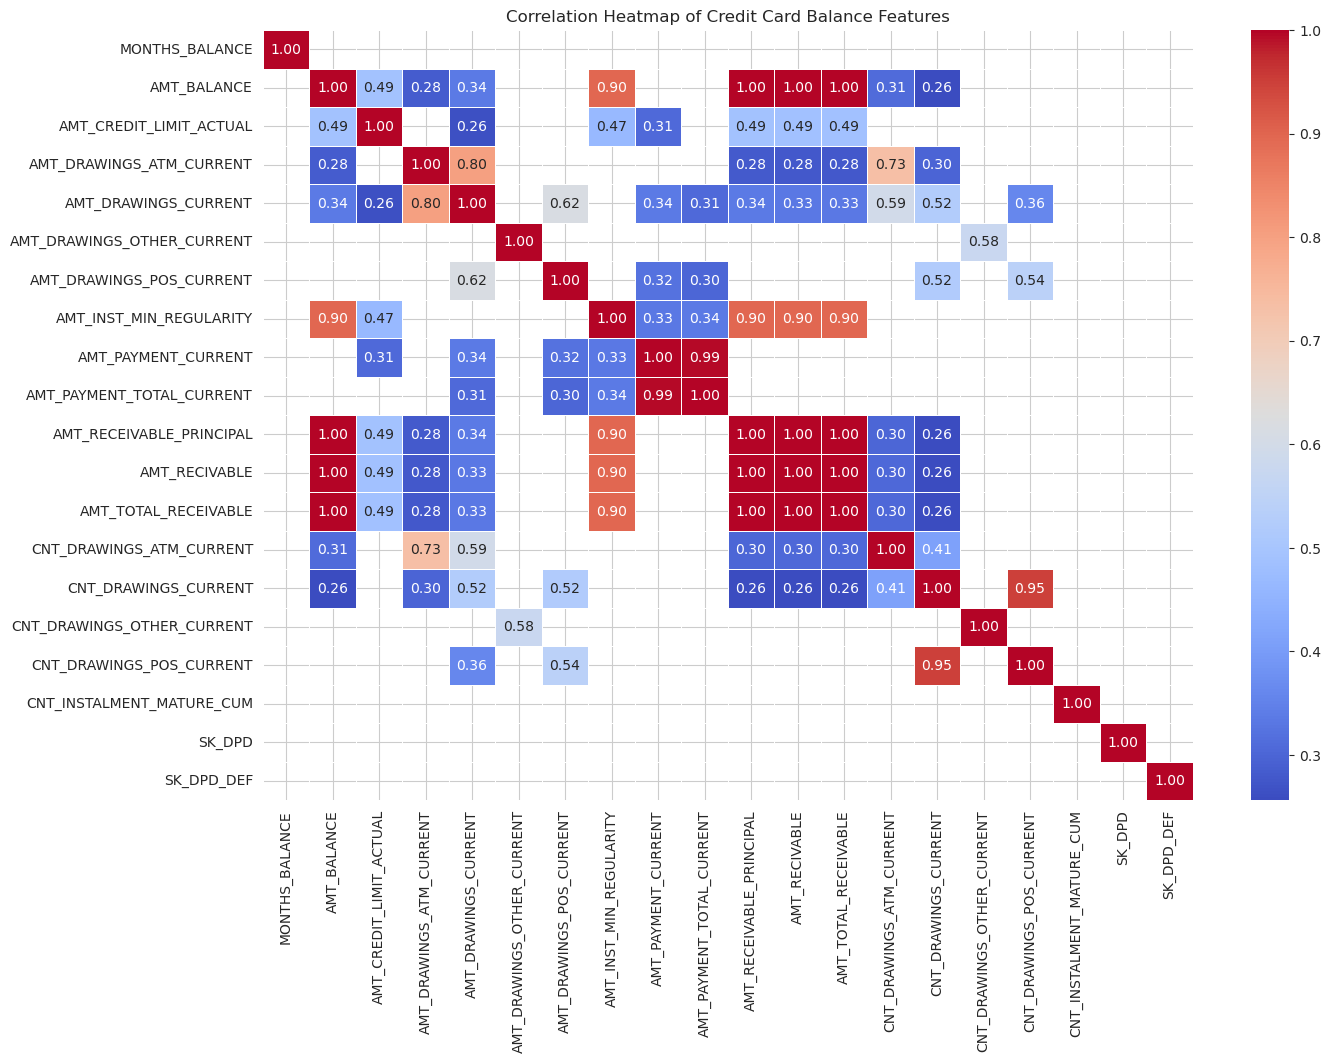

In [27]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix[abs(correlation_matrix) > 0.25], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Heatmap of Credit Card Balance Features')
plt.show()

---
- We can see correlation of 1 of AMT_RECIEVABLE group of related features. 
- All other correlations also seem to be steming from features that share the same origin.
- These almost duplicate features might cause some issues during modeling. 
- Pre-model building correlation filtering should be done. 

---

In [28]:
credit_card_balance['AMT_BALANCE'][credit_card_balance['AMT_BALANCE'] != 0]

0              56.970
1           63975.555
2           31815.225
3          236572.110
4          453919.455
              ...    
3840298    260671.500
3840299     81697.275
3840300     81697.275
3840301    277204.095
3840309    275784.975
Name: AMT_BALANCE, Length: 1683892, dtype: float64

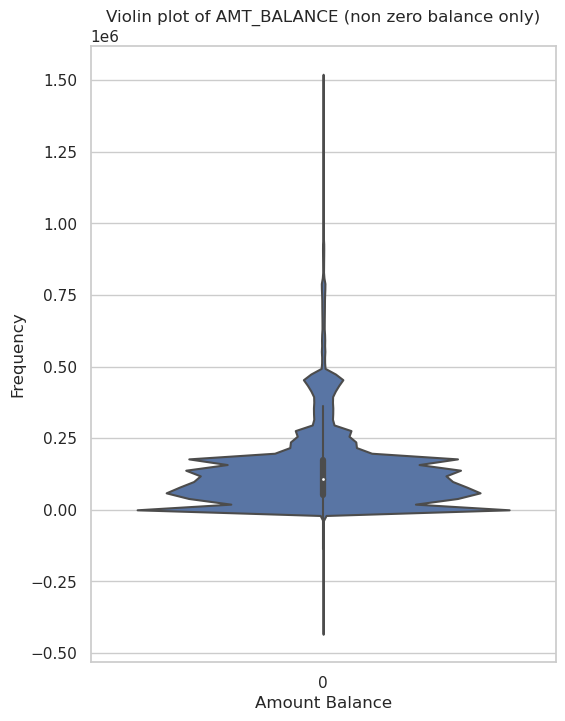

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 8))
sns.violinplot(credit_card_balance['AMT_BALANCE'][credit_card_balance['AMT_BALANCE'] != 0])
plt.title('Violin plot of AMT_BALANCE (non zero balance only)')
plt.xlabel('Amount Balance')
plt.ylabel('Frequency')
plt.show()

- We can see now this range visualized, highest frequency between 0 and 200,000. 

## POS_CASH_balance.csv

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [30]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [44]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

---
- Relatively low number of missing values considerng amount of entries. 
- Missing values related to Instalments. 

---

In [31]:
POS_CASH_balance['SK_DPD'].describe().apply(lambda x: f"{x:,.2f}")

count    10,001,358.00
mean             11.61
std             132.71
min               0.00
25%               0.00
50%               0.00
75%               0.00
max           4,231.00
Name: SK_DPD, dtype: object

---
- The average days past due is approximately 11.61. While this is relatively low, it indicates that, on average, there is a slight delay in payments across all loans.
- A high standard deviation of 132.71 shows significant variation in the number of overdue days among different loans.
- At least 75% of the loans have no days past due. This implies that the majority of loans are paid on time or within the grace period.
---

In [32]:
continuous_columns = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
correlation_matrix = POS_CASH_balance[continuous_columns].corr()

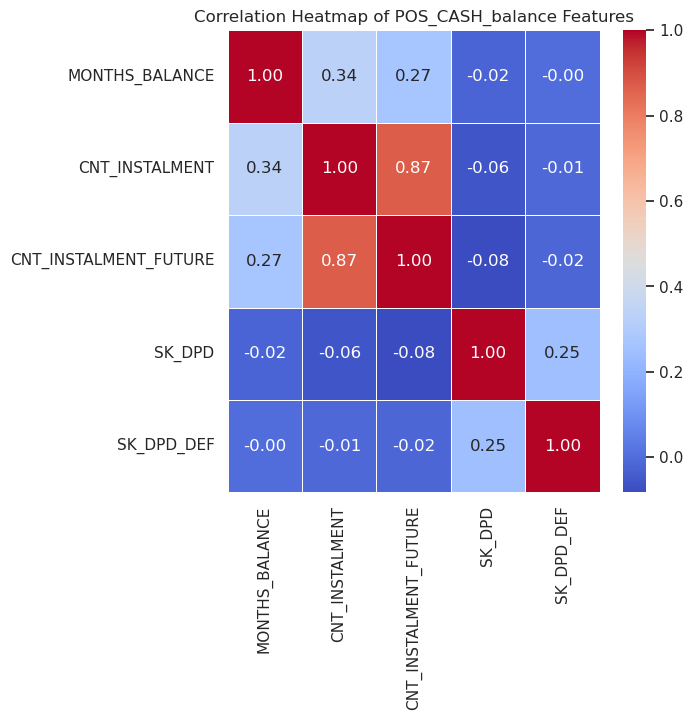

In [33]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Correlation Heatmap of POS_CASH_balance Features')
plt.show()

- Besides connected features (based on names), no significant correlations.

## previous_application.csv


- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

In [34]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

- With 1.67 million entries and 37 columns, this dataset offers a comprehensive view of the applicants' loan history.

In [45]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

--- 

- Again in this dataset we can see some clustering of missing values. 
- DAYS features, interest rate, down payment, payment and annuity are ones coupled. 

---

In [35]:
previous_application['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

---
- We can see that Cah and Consumer loans are most popular ones, and have simmilar counts.
- Revolving loans, with set credit limit are less common but still large proportion. 
- Rest missing or uncategorized
---

In [36]:
previous_application['AMT_CREDIT'].describe().apply(lambda x: f"{x:,.2f}")

count    1,670,213.00
mean       196,114.02
std        318,574.62
min              0.00
25%         24,160.50
50%         80,541.00
75%        216,418.50
max      6,905,160.00
Name: AMT_CREDIT, dtype: object

---
- The average credit amount is approximately 196,114.02, median is 80,541.00. Indicating some rights ceweness.   
- A high standard deviation of 318,574.62 indicates significant variability in the credit amounts.
- The minimum credit amount is 0.00, which might indicate applications with no credit requested or possibly data entry errors.
- The maximum credit amount is a substantial 6,905,160.00, indicating that while most loan applications are for lower amounts, there are exceptional cases with very high credit amounts.

---

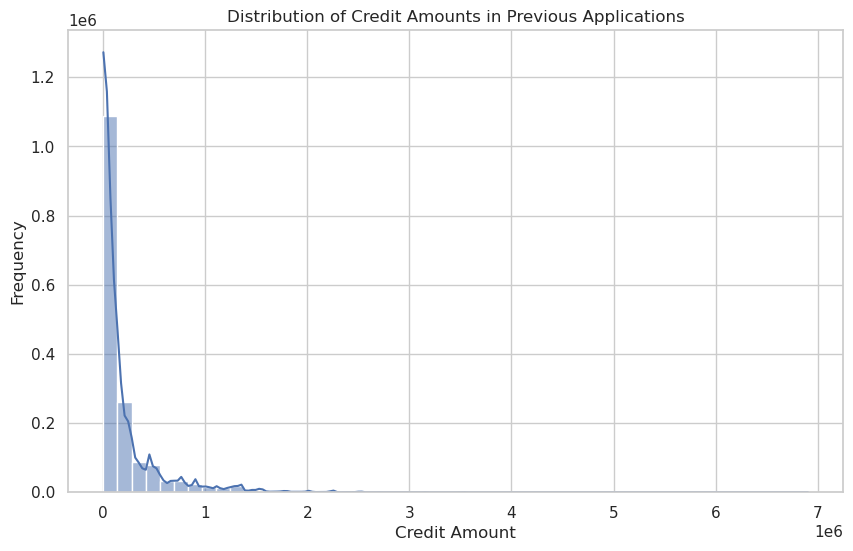

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(previous_application['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Credit Amounts in Previous Applications')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

## installments_payments.csv


- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [38]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [46]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

---
- Quite low number of missing values. 
- Not having big effect on quality of this data I think. 

---

In [39]:
installments_payments['AMT_PAYMENT'].describe().apply(lambda x: f"{x:,.2f}")

count    13,602,496.00
mean         17,238.22
std          54,735.78
min               0.00
25%           3,398.26
50%           8,125.52
75%          16,108.42
max       3,771,487.85
Name: AMT_PAYMENT, dtype: object

---

- Mean installment amount is 17,238.22.
- Again, high std as in previously observed feature descriptions. 
- 75% still quite low in comparison to the max value of 3.77 milion. 

---

## HomeCredit_columns_description.csv

- This file contains descriptions for the columns in the various data files.
- Will not use it here, potential use when doing feature selection and feature engeneering before modeling.

### Checking how many features that are present in final dataset are present in these datasets

In [52]:
application_train_features = application_train.columns.tolist()
other_datasets = ['bureau.csv', 'bureau_balance.csv','previous_application.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv']
for dataset_file in other_datasets:
    current_dataset = pd.read_csv(dataset_file)
    current_dataset_features = current_dataset.columns.tolist()
    overlapping_features = set(application_train_features).intersection(current_dataset_features)
    print(f'Overlapping features from {dataset_file}: {", ".join(overlapping_features)}')


Overlapping features from bureau.csv: AMT_ANNUITY, SK_ID_CURR
Overlapping features from bureau_balance.csv: 
Overlapping features from previous_application.csv: HOUR_APPR_PROCESS_START, WEEKDAY_APPR_PROCESS_START, NAME_TYPE_SUITE, NAME_CONTRACT_TYPE, SK_ID_CURR, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE
Overlapping features from credit_card_balance.csv: SK_ID_CURR
Overlapping features from installments_payments.csv: SK_ID_CURR
Overlapping features from POS_CASH_balance.csv: SK_ID_CURR


---
- Highest overlap with previous_application.csv, besides that it seems SK_ID_CURR is the common feature.
- Potential benefit from merging datasets into the application_test based on the SK_ID_CURR feature. 
- There are some data leakage risks though as the procedure of building application_test.csv is not described. It is possible that the 'TARGET' feature in application_test is already some sort of representation of defaults from these different datasets. 
- At this point I will opt for not merging the datasets. Possibly later after initial odel is built this can be done. 

---